# Introduction

The analysis of air quality data stands as a crucial component in understanding the environmental landscape of various regions. This project delves into a comprehensive exploration and analysis of air quality metrics sourced from diverse locations across different periods. The dataset encompasses a spectrum of parameters, including concentrations of particulate matter, spatial dimensions, and associated indicators, etc.

The primary aim of this project is to conduct an in-depth examination of air quality metrics, identifying trends, correlations, and statistical patterns within the dataset.

# 1. Connecting to Database in Microsoft SQL Server Management Studio

In [1]:
import pyodbc
import pandas as pd 
from IPython.display import display

import warnings 
warnings.filterwarnings('ignore')

In [2]:
conn = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-BW2001\MSSQLSERVER01;'
                      'Database=air_quality;' 'Trusted_connection=yes')

In [3]:
if conn:
    print('True')

True


### First 10 rows

In [4]:
sql_query = "SELECT TOP 10 * FROM dbo.[Air Quality Data]"

try:
    df = pd.read_sql(sql_query, conn)
    display(df)

except pyodbc.Error as e:
    print(f"Error executing SQL query: {e}")

IndicatorCode                                          Indicator  \
0       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
1       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
2       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
3       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
4       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
5       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
6       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
7       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
8       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9       SDGPM25  Concentrations of fine particulate matter (PM2.5)   

  ParentLocationCode ParentLocation Location_type SpatialDimValueCode  \
0                AFR         Africa       Country                 KEN   
1                AMR       Americas       Country                 TTO   
2                EUR         Europe       Country                 GBR   
3                AMR       Americas       Country                 GRD   
4                AMR       Americas       Country                 BRA   
5                EUR         Europe       Country                 DNK   
6                EUR         Europe       Country                 RUS   
7                EUR         Europe       Country                 ESP   
8                AMR       Americas       Country                 GRD   
9                AMR       Americas       Country                 GRD   

                                            Location Period_type  Period  \
0                                              Kenya        Year    2019   
1                                Trinidad and Tobago        Year    2019   
2  United Kingdom of Great Britain and Northern I...        Year    2019   
3                                            Grenada        Year    2019   
4                                             Brazil        Year    2019   
5                                            Denmark        Year    2019   
6                                 Russian Federation        Year    2019   
7                                              Spain        Year    2019   
8                                            Grenada        Year    2019   
9                                            Grenada        Year    2019   

  IsLatestYear            Dim1_type    Dim1           Dim1ValueCode  \
0         TRUE  Residence Area Type  Cities                    CITY   
1         TRUE  Residence Area Type   Rural                     RUR   
2         TRUE  Residence Area Type  Cities                    CITY   
3         TRUE  Residence Area Type   Total  RESIDENCEAREATYPE_TOTL   
4         TRUE  Residence Area Type   Towns                    TOWN   
5         TRUE  Residence Area Type   Urban                     URB   
6         TRUE  Residence Area Type  Cities                    CITY   
7         TRUE  Residence Area Type  Cities                    CITY   
8         TRUE  Residence Area Type   Towns                    TOWN   
9         TRUE  Residence Area Type   Urban                     URB   

   FactValueNumeric  FactValueNumericLow  FactValueNumericHigh  \
0             10.01                 6.29                 13.74   
1             10.02                 7.44                 12.55   
2             10.06                 9.73                 10.39   
3             10.08                 7.07                 13.20   
4             10.09                 8.23                 12.46   
5             10.12                 9.37                 10.97   
6             10.19                 8.58                 12.57   
7             10.19                 9.94                 10.38   
8             10.22                 7.15                 13.37   
9             10.22                 7.15                 13.37   

                  Value Language              DateModified  
0  10.01 [6.29 – 13.

# 2. Data Exploration and Summary Statistics

## 2.1 Count of Records

In [5]:
count_records_query = "SELECT COUNT(*) AS Record_Count FROM dbo.[Air Quality Data]"

try:
    count_records_df = pd.read_sql(count_records_query, conn)
    display(count_records_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for count of records: {e}")

Record_Count
0          9450

## 2.2 Distinct Locations

In [6]:
distinct_locations_query = "SELECT COUNT(DISTINCT Location) AS Unique_Locations FROM dbo.[Air Quality Data]"

try:
    distinct_locations_df = pd.read_sql(distinct_locations_query, conn)
    display(distinct_locations_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for distinct locations: {e}")

Unique_Locations
0               195

## 2.3 Period Range

In [7]:
period_range_query = "SELECT MIN(Period) AS Min_Period, MAX(Period) AS Max_Period FROM dbo.[Air Quality Data]"

try:
    period_range_df = pd.read_sql(period_range_query, conn)
    display(period_range_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for period range: {e}")

Min_Period  Max_Period
0        2010        2019

## 2.4 Descriptive Statstics

### Average, Minimum, Maximum Values

In [8]:
summary_fact_value_numeric = """
SELECT 
    MIN(FactValueNumeric) AS Min_FactValueNumeric,
    MAX(FactValueNumeric) AS Max_FactValueNumeric,
    AVG(FactValueNumeric) AS Avg_FactValueNumeric,
    STDEV(FactValueNumeric) AS StdDev_FactValueNumeric
FROM dbo.[Air Quality Data];
"""

try:
    summary_fact_value_numeric_df = pd.read_sql(summary_fact_value_numeric, conn)
    display(summary_fact_value_numeric_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for FactValueNumeric summary statistics: {e}")


Min_FactValueNumeric  Max_FactValueNumeric  Avg_FactValueNumeric  \
0                  4.59             97.489998             23.538435   

   StdDev_FactValueNumeric  
0                15.024029

In [9]:
summary_fact_value_numeric_low = """
SELECT 
    MIN(FactValueNumericLow) AS Min_FactValueNumericLow,
    MAX(FactValueNumericLow) AS Max_FactValueNumericLow,
    AVG(FactValueNumericLow) AS Avg_FactValueNumericLow,
    STDEV(FactValueNumericLow) AS StdDev_FactValueNumericLow
FROM dbo.[Air Quality Data];
"""

try:
    summary_fact_value_numeric_low_df = pd.read_sql(summary_fact_value_numeric_low, conn)
    display(summary_fact_value_numeric_low_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for FactValueNumericLow summary statistics: {e}")


Min_FactValueNumericLow  Max_FactValueNumericLow  Avg_FactValueNumericLow  \
0                     1.41                70.239998                16.229705   

   StdDev_FactValueNumericLow  
0                   11.174679

In [10]:
summary_fact_value_numeric_high = """
SELECT 
    MIN(FactValueNumericHigh) AS Min_FactValueNumericHigh,
    MAX(FactValueNumericHigh) AS Max_FactValueNumericHigh,
    AVG(FactValueNumericHigh) AS Avg_FactValueNumericHigh,
    STDEV(FactValueNumericHigh) AS StdDev_FactValueNumericHigh
FROM dbo.[Air Quality Data];
"""

try:
    summary_fact_value_numeric_high_df = pd.read_sql(summary_fact_value_numeric_high, conn)
    display(summary_fact_value_numeric_high_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for FactValueNumericHigh summary statistics: {e}")


Min_FactValueNumericHigh  Max_FactValueNumericHigh  \
0                      5.26                175.600006   

   Avg_FactValueNumericHigh  StdDev_FactValueNumericHigh  
0                 35.267488                    26.862582

### Median

#### FactValueNumeric

In [11]:
median_numeric_query = """
SELECT 
    AVG(FactValueNumeric) AS Median_FactValueNumeric
FROM (
    SELECT 
        FactValueNumeric,
        NTILE(2) OVER (ORDER BY FactValueNumeric) AS Tile
    FROM dbo.[Air Quality Data]
) AS Subquery
WHERE Tile = 2;
"""

try:
    median_numeric_df = pd.read_sql(median_numeric_query, conn)
    median_numeric_value = median_numeric_df.iloc[0]['Median_FactValueNumeric']  # Accessing the median value
    print(f"The median for FactValueNumeric is: {median_numeric_value}")

except pyodbc.Error as e:
    print(f"Error executing SQL query for median calculation (FactValueNumeric): {e}")


The median for FactValueNumeric is: 34.929659275276954


#### FactValueNumericLow

In [12]:
median_low_query = """
SELECT 
    AVG(FactValueNumericLow) AS Median_FactValueNumericLow
FROM (
    SELECT 
        FactValueNumericLow,
        NTILE(2) OVER (ORDER BY FactValueNumericLow) AS Tile
    FROM dbo.[Air Quality Data]
) AS Subquery
WHERE Tile = 2;
"""

try:
    median_low_df = pd.read_sql(median_low_query, conn)
    median_low_value = median_low_df.iloc[0]['Median_FactValueNumericLow']  # Accessing the median value
    print(f"The median for FactValueNumericLow is: {median_low_value}")

except pyodbc.Error as e:
    print(f"Error executing SQL query for median calculation (FactValueNumericLow): {e}")

The median for FactValueNumericLow is: 24.30553228368204


#### FactValueNumericHigh

In [13]:
median_query = """
SELECT 
    AVG(FactValueNumericHigh) AS Median_FactValueNumericHigh
FROM (
    SELECT 
        FactValueNumericHigh,
        NTILE(2) OVER (ORDER BY FactValueNumericHigh) AS Tile
    FROM dbo.[Air Quality Data]
) AS Subquery
WHERE Tile = 2;
"""

try:
    median_df = pd.read_sql(median_query, conn)
    median_value = median_df.iloc[0]['Median_FactValueNumericHigh']  # Accessing the median value
    print(f"The median for FactValueNumericHigh is: {median_value}")

except pyodbc.Error as e:
    print(f"Error executing SQL query for median calculation: {e}")

The median for FactValueNumericHigh is: 54.42835764163386


### Quartiles Calculation (25th and 75th percentiles)

#### FactValueNumeric

In [14]:
quartiles_query = """
SELECT 
    MIN(FactValueNumeric) AS Q1,
    MAX(FactValueNumeric) AS Q3
FROM (
    SELECT 
        FactValueNumeric,
        NTILE(4) OVER (ORDER BY FactValueNumeric) AS Quartile
    FROM dbo.[Air Quality Data]
) AS Quartiles
WHERE Quartile IN (1, 3);
"""

try:
    quartiles_df = pd.read_sql(quartiles_query, conn)
    display(quartiles_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for quartiles calculation using NTILE: {e}")


Q1     Q3
0  4.59  30.98

#### FactValueNumericLow

In [15]:
quartiles_low_query = """
SELECT 
    MIN(FactValueNumericLow) AS Q1,
    MAX(FactValueNumericLow) AS Q3
FROM (
    SELECT 
        FactValueNumericLow,
        NTILE(4) OVER (ORDER BY FactValueNumericLow) AS Quartile
    FROM dbo.[Air Quality Data]
) AS Quartiles
WHERE Quartile IN (1, 3);
"""

try:
    quartiles_low_df = pd.read_sql(quartiles_low_query, conn)
    display(quartiles_low_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for quartiles (FactValueNumericLow): {e}")


Q1     Q3
0  1.41  20.34

#### FactValueNumericHigh

In [16]:
quartiles_high_query = """
SELECT 
    MIN(FactValueNumericHigh) AS Q1_FactValue_High,
    MAX(FactValueNumericHigh) AS Q3_FactValue_High
FROM (
    SELECT 
        FactValueNumericHigh,
        NTILE(4) OVER (ORDER BY FactValueNumericHigh) AS Quartile
    FROM dbo.[Air Quality Data]
) AS Quartiles
WHERE Quartile IN (1, 3);
"""

try:
    quartiles_high_df = pd.read_sql(quartiles_high_query, conn)
    display(quartiles_high_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for quartiles (FactValueNumericHigh): {e}")


Q1_FactValue_High  Q3_FactValue_High
0               5.26          48.970001

### Standard Deviation and Variance

#### FactValueNumeric

In [17]:
std_dev_and_variance_query = """
SELECT 
    SQRT(SUM((FactValueNumeric - MeanValue) * (FactValueNumeric - MeanValue)) / COUNT(*)) AS StdDev_FactValue_Numeric,
    SUM((FactValueNumeric - MeanValue) * (FactValueNumeric - MeanValue)) / COUNT(*) AS Variance_FactValue_Numeric
FROM (
    SELECT 
        FactValueNumeric,
        AVG(FactValueNumeric) OVER () AS MeanValue
    FROM dbo.[Air Quality Data]
) AS SubQuery;
"""

try:
    std_dev_and_variance_df = pd.read_sql(std_dev_and_variance_query, conn)
    display(std_dev_and_variance_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for standard deviation and variance calculation: {e}")

StdDev_FactValue_Numeric  Variance_FactValue_Numeric
0                 15.023234                  225.697574

#### FactValueNumericHigh

In [18]:
# Variance for FactValueNumericHigh
variance_high_query = """
SELECT 
    STDEV(FactValueNumericHigh) AS StdDev_FactValueNumericHigh,
    (SUM(POWER(FactValueNumericHigh - MeanValue, 2)) / COUNT(*)) AS Variance_FactValueNumericHigh
FROM (
    SELECT 
        FactValueNumericHigh,
        AVG(FactValueNumericHigh) OVER () AS MeanValue
    FROM dbo.[Air Quality Data]
) AS SubQuery;
"""

try:
    variance_high_df = pd.read_sql(variance_high_query, conn)
    display(variance_high_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for variance (FactValueNumericHigh): {e}")

StdDev_FactValueNumericHigh  Variance_FactValueNumericHigh
0                    26.862582                     713.809654

#### FactValueNumericLow

In [19]:
# Variance for FactValueNumericLow
variance_low_query = """
SELECT 
    STDEV(FactValueNumericLow) AS StdDev_FactValueNumericLow,
    (SUM(POWER(FactValueNumericLow - MeanValue, 2)) / COUNT(*)) AS Variance_FactValueNumericLow
FROM (
    SELECT 
        FactValueNumericLow,
        AVG(FactValueNumericLow) OVER () AS MeanValue
    FROM dbo.[Air Quality Data]
) AS SubQuery;
"""

try:
    variance_low_df = pd.read_sql(variance_low_query, conn)
    display(variance_low_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for variance (FactValueNumericLow): {e}")


StdDev_FactValueNumericLow  Variance_FactValueNumericLow
0                   11.174679                     124.86024

### Correlation Analysis

In [20]:
correlation_query = """
SELECT 
    (SUM(FactValueNumeric * FactValueNumericLow) - COUNT(*) * AVG(FactValueNumeric) * AVG(FactValueNumericLow)) /
    (SQRT((SUM(POWER(FactValueNumeric, 2)) - COUNT(*) * POWER(AVG(FactValueNumeric), 2)) * 
    (SUM(POWER(FactValueNumericLow, 2)) - COUNT(*) * POWER(AVG(FactValueNumericLow), 2)))) AS Corr_FactValueNumeric_FactValueNumericLow,
    
    (SUM(FactValueNumeric * FactValueNumericHigh) - COUNT(*) * AVG(FactValueNumeric) * AVG(FactValueNumericHigh)) /
    (SQRT((SUM(POWER(FactValueNumeric, 2)) - COUNT(*) * POWER(AVG(FactValueNumeric), 2)) * 
    (SUM(POWER(FactValueNumericHigh, 2)) - COUNT(*) * POWER(AVG(FactValueNumericHigh), 2)))) AS Corr_FactValueNumeric_FactValueNumericHigh
    -- Add more correlations between other numeric columns as needed
FROM dbo.[Air Quality Data];
"""

try:
    correlation_df = pd.read_sql(correlation_query, conn)
    display(correlation_df)

except pyodbc.Error as e:
    print(f"Error executing SQL query for correlation calculation: {e}")


Corr_FactValueNumeric_FactValueNumericLow  \
0                                   0.876902   

   Corr_FactValueNumeric_FactValueNumericHigh  
0                                    0.837392

The correlation coefficient between 'FactValueNumeric' and 'FactValueNumericLow' stands notably strong at approximately 0.877, indicating a robust positive relationship between these two variables. Similarly, the correlation coefficient between 'FactValueNumeric' and 'FactValueNumericHigh' registers at around 0.837, affirming another significant positive correlation within this dataset.

### Covariance

#### Covariance between FactValueNumeric and FactValueNumericHigh

In [21]:
# Fetch the relevant columns from the database
cov_query = """
SELECT 
    FactValueNumeric,
    FactValueNumericHigh
FROM dbo.[Air Quality Data];
"""

try:
    cov_df = pd.read_sql(cov_query, conn)

    # Compute covariance using pandas
    covariance = cov_df['FactValueNumeric'].cov(cov_df['FactValueNumericHigh'])
    print(f"Covariance between FactValueNumeric and FactValueNumericHigh: {covariance}")

except pyodbc.Error as e:
    print(f"Error executing SQL query: {e}")


Covariance between FactValueNumeric and FactValueNumericHigh: 347.84541921415496


The covariance value between 'FactValueNumeric' and 'FactValueNumericHigh' is approximately 347.85 which signifies a substantial positive covariance between these two attributes.

#### Covariance between FactValueNumeric and FactValueNumericLow

In [22]:
# Fetch the relevant columns from the database
cov_query = """
SELECT 
    FactValueNumeric,
    FactValueNumericLow
FROM dbo.[Air Quality Data];
"""

try:
    cov_df = pd.read_sql(cov_query, conn)

    # Compute covariance using pandas
    covariance = cov_df['FactValueNumeric'].cov(cov_df['FactValueNumericLow'])
    print(f"Covariance between FactValueNumeric and FactValueNumericLow: {covariance}")

except pyodbc.Error as e:
    print(f"Error executing SQL query: {e}")


Covariance between FactValueNumeric and FactValueNumericLow: 147.22199983533415


The computed covariance of approximately 147.22 between 'FactValueNumeric' and 'FactValueNumericLow' offers an intriguing perspective on their joint variability within the dataset.

Comparing this covariance with the previous finding for 'FactValueNumeric' and 'FactValueNumericHigh' (347.85), it's apparent that 'FactValueNumeric' exhibits a higher joint variability with 'FactValueNumericHigh' compared to 'FactValueNumericLow'.

# 3. Data Visualization

## 3.1 Data Preparation

In [23]:
sql_query = "SELECT * FROM dbo.[Air Quality Data];"

data = pd.read_sql(sql_query, conn)

In [24]:
data.dropna(inplace=True)

In [25]:
data.head()

IndicatorCode                                          Indicator  \
0       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
1       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
2       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
3       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
4       SDGPM25  Concentrations of fine particulate matter (PM2.5)   

  ParentLocationCode ParentLocation Location_type SpatialDimValueCode  \
0                AFR         Africa       Country                 KEN   
1                AMR       Americas       Country                 TTO   
2                EUR         Europe       Country                 GBR   
3                AMR       Americas       Country                 GRD   
4                AMR       Americas       Country                 BRA   

                                            Location Period_type  Period  \
0                                              Kenya        Year    2019   
1                                Trinidad and Tobago        Year    2019   
2  United Kingdom of Great Britain and Northern I...        Year    2019   
3                                            Grenada        Year    2019   
4                                             Brazil        Year    2019   

  IsLatestYear            Dim1_type    Dim1           Dim1ValueCode  \
0         TRUE  Residence Area Type  Cities                    CITY   
1         TRUE  Residence Area Type   Rural                     RUR   
2         TRUE  Residence Area Type  Cities                    CITY   
3         TRUE  Residence Area Type   Total  RESIDENCEAREATYPE_TOTL   
4         TRUE  Residence Area Type   Towns                    TOWN   

   FactValueNumeric  FactValueNumericLow  FactValueNumericHigh  \
0             10.01                 6.29                 13.74   
1             10.02                 7.44                 12.55   
2             10.06                 9.73                 10.39   
3             10.08                 7.07                 13.20   
4             10.09                 8.23                 12.46   

                  Value Language              DateModified  
0  10.01 [6.29 – 13.74]       EN  2022-08-11T22:00:00.000Z  
1  10.02 [7.44 – 12.55]       EN  2022-08-11T22:00:00.000Z  
2  10.06 [9.73 – 10.39]       EN  2022-08-11T22:00:00.000Z  
3   10.08 [7.07 – 13.2]       EN  2022-08-11T22:00:00.000Z  
4  10.09 [8.23 – 12.46]       EN  2022-08-11T22:00:00.000Z

In [26]:
data.shape

(9349, 19)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IndicatorCode         10 non-null     object 
 1   Indicator             10 non-null     object 
 2   ParentLocationCode    10 non-null     object 
 3   ParentLocation        10 non-null     object 
 4   Location_type         10 non-null     object 
 5   SpatialDimValueCode   10 non-null     object 
 6   Location              10 non-null     object 
 7   Period_type           10 non-null     object 
 8   Period                10 non-null     int64  
 9   IsLatestYear          10 non-null     object 
 10  Dim1_type             10 non-null     object 
 11  Dim1                  10 non-null     object 
 12  Dim1ValueCode         10 non-null     object 
 13  FactValueNumeric      10 non-null     float64
 14  FactValueNumericLow   10 non-null     float64
 15  FactValueNumericHigh  10 n

### Convert 'DateModified' to `datetime`

In [28]:
data['DateModified'] = pd.to_datetime(data['DateModified'])
data['DateModified'].dtype

datetime64[ns, UTC]

### Modify 'IsLatestYear' column

In [29]:
data['IsLatestYear'] = data['IsLatestYear'].map({'TRUE': True, 'FALSE': False})  # Adjust mapping as per actual data
data['IsLatestYear'] = data['IsLatestYear'].astype(bool)
data['IsLatestYear'].dtype

dtype('bool')

### Removing columns that doesn't offer any variability or useful information for analysis as it's constant

#### IndicatorCode

In [30]:
data['IndicatorCode'].value_counts() # All values are the same

IndicatorCode
SDGPM25    9349
Name: count, dtype: int64

In [31]:
data.drop('IndicatorCode', axis = 1, inplace=True)

#### Indicator

In [32]:
data['Indicator'].value_counts() # All values are the same

Indicator
Concentrations of fine particulate matter (PM2.5)    9349
Name: count, dtype: int64

In [33]:
data.drop('Indicator', axis = 1, inplace=True)

#### Period_type

In [34]:
data['Period_type'].value_counts() # All values are the same

Period_type
Year    9349
Name: count, dtype: int64

In [35]:
data.drop('Period_type', axis = 1, inplace=True)

#### Location_type

In [36]:
data['Location_type'].value_counts() # All values are the same

Location_type
Country    9349
Name: count, dtype: int64

In [37]:
data.drop('Location_type', axis = 1, inplace=True)

#### Dim1_type

In [38]:
data['Dim1_type'].value_counts() # All values are the same

Dim1_type
Residence Area Type    9349
Name: count, dtype: int64

In [39]:
data.drop('Dim1_type', axis = 1, inplace=True)

#### Language

In [40]:
data['Language'].value_counts() # All Values are the same

Language
EN    9349
Name: count, dtype: int64

In [41]:
data.drop('Language', axis = 1, inplace=True)

#### Value

Dropping 'Value' column because the values are already found in the FactValueNumeric, FactValueNumericLow, and FactValueNumericHigh columns

In [42]:
data.drop('Value', axis = 1, inplace = True)

## 3.2 Visualizations

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9349 entries, 0 to 9449
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   ParentLocationCode    9349 non-null   object             
 1   ParentLocation        9349 non-null   object             
 2   SpatialDimValueCode   9349 non-null   object             
 3   Location              9349 non-null   object             
 4   Period                9349 non-null   int64              
 5   IsLatestYear          9349 non-null   bool               
 6   Dim1                  9349 non-null   object             
 7   Dim1ValueCode         9349 non-null   object             
 8   FactValueNumeric      9349 non-null   float64            
 9   FactValueNumericLow   9349 non-null   float64            
 10  FactValueNumericHigh  9349 non-null   float64            
 11  DateModified          9349 non-null   datetime64[ns, UTC]
dtypes: bool(1),

### 3.2.1 Plotting Numerical Columns

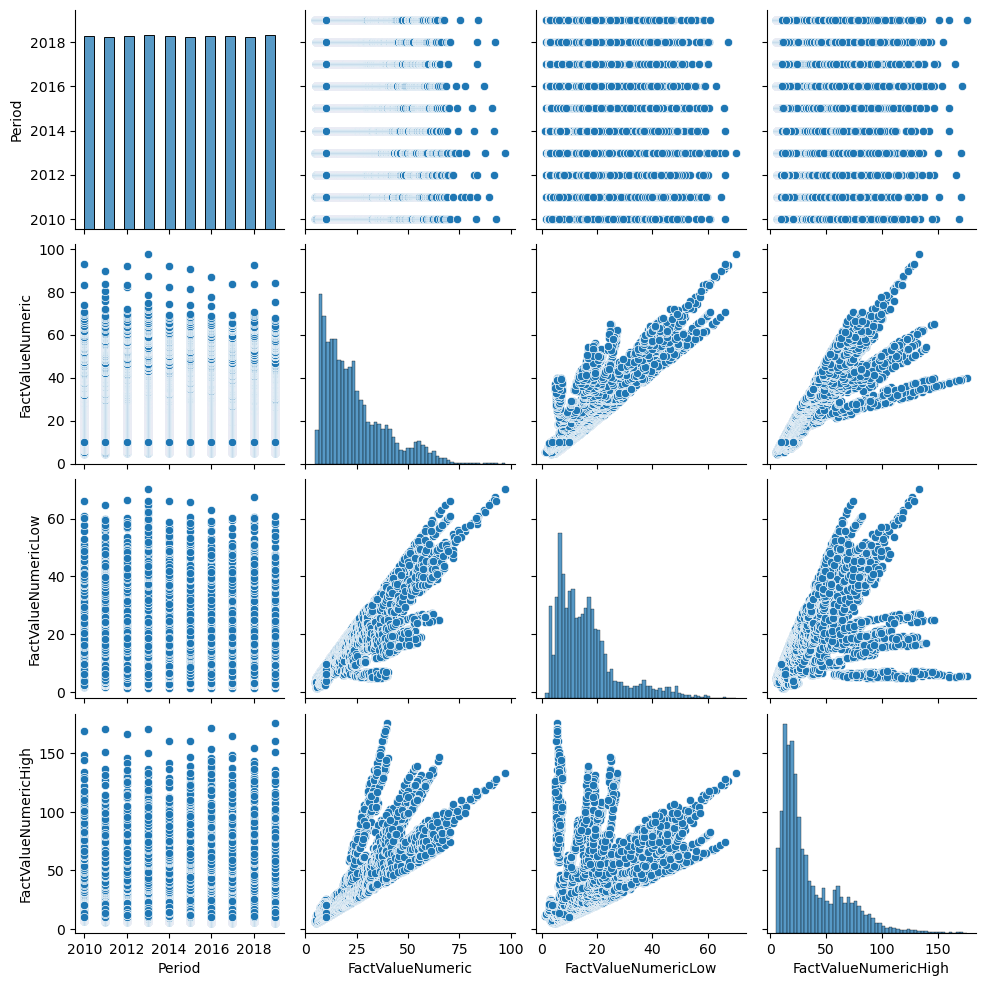

In [45]:
numeric_columns = ['Period', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh']

# Pairplot
sns.pairplot(data[numeric_columns])
plt.show()

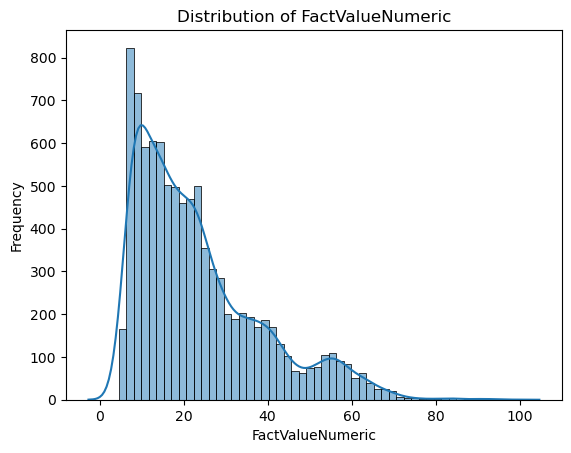

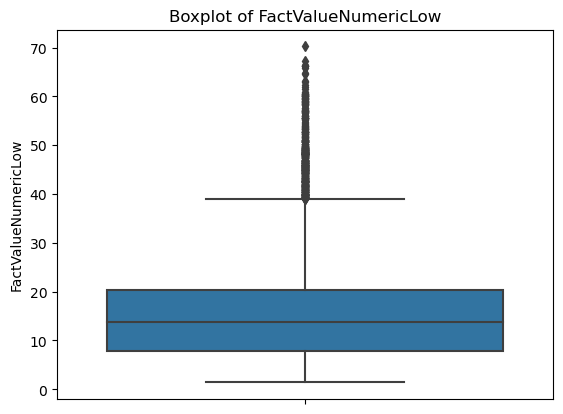

In [46]:
# Distribution plot for 'FactValueNumeric'
sns.histplot(data['FactValueNumeric'], kde = True, kde_kws = {'cut':3})
plt.xlabel('FactValueNumeric')
plt.ylabel('Frequency')
plt.title('Distribution of FactValueNumeric')
plt.show()

# Boxplot for 'FactValueNumericLow'
sns.boxplot(data = data, y = 'FactValueNumericLow')
plt.ylabel('FactValueNumericLow')
plt.title('Boxplot of FactValueNumericLow')
plt.show()

The distribution plot of 'FactValueNumeric' reveals an asymmetric pattern, with the majority of data clustered towards the left side, displaying a peaked curve. This pattern indicates a higher frequency of values within a specific range on the lower end of the scale.

Meanwhile, the boxplot representation of 'FactValueNumericLow' showcases the central tendency and dispersion of this attribute. With the median line approximately situated at 15, the boxplot illustrates the median value's position within the dataset. 

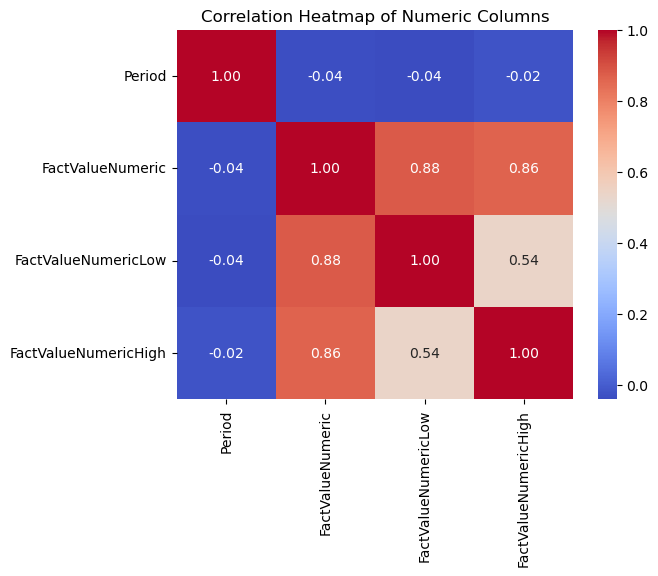

In [47]:
# Correlation Heatmap
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

### 3.2.2 Categorical Columns

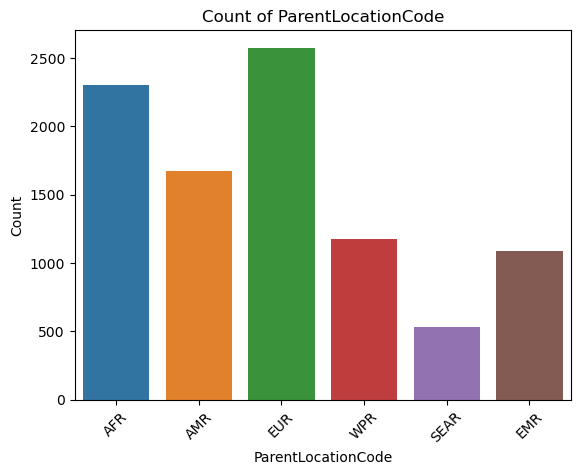

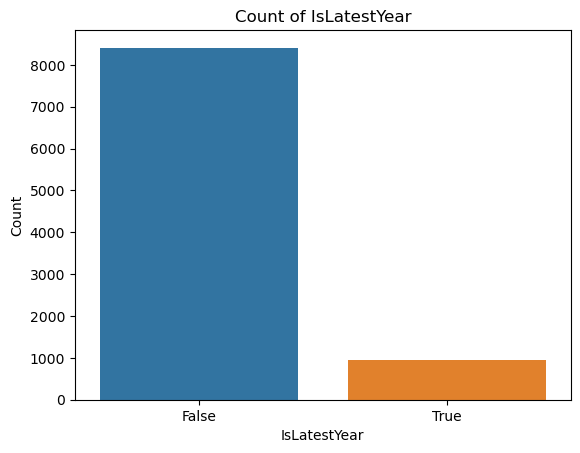

In [48]:
categorical_columns = ['ParentLocationCode', 'IsLatestYear', 'Dim1']

# Countplot for 'ParentLocationCode'
sns.countplot(data=data, x='ParentLocationCode')
plt.xticks(rotation=45)
plt.xlabel('ParentLocationCode')
plt.ylabel('Count')
plt.title('Count of ParentLocationCode')
plt.show()

# Countplot for 'IsLatestYear'
sns.countplot(data=data, x='IsLatestYear')
plt.xlabel('IsLatestYear')
plt.ylabel('Count')
plt.title('Count of IsLatestYear')
plt.show()

The 'ParentLocationCode' countplot portrays a distribution of occurrences across different geographical parent locations. Notably, EUR exhibits the highest frequency among the locations, followed by AFR, AMR, WPR, EMR, and SEAR. This distribution provides insight into the prevalence of data originating from these geographical areas, with EUR standing out as the most represented parent location within the dataset.

Conversely, the countplot for 'IsLatestYear' delineates a striking imbalance in the distribution of the 'IsLatestYear' attribute. The majority of entries are categorized as 'False', comprising approximately 8000 instances, while 'True' holds a notably lower frequency, with almost a thousand occurrences. This disparity suggests a significant skew towards 'False' instances within the dataset, indicating a potential imbalance or characteristic feature within the 'IsLatestYear' categorical variable.

## 3.3 Relationships

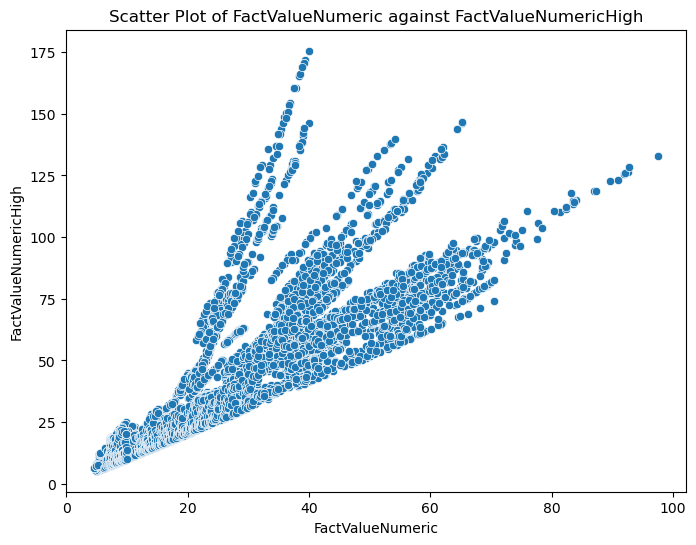

In [49]:
# Scatter plot for 'FactValueNumeric' against 'FactValueNumericLow'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='FactValueNumeric', y='FactValueNumericHigh')
plt.xlabel('FactValueNumeric')
plt.ylabel('FactValueNumericHigh')
plt.title('Scatter Plot of FactValueNumeric against FactValueNumericHigh')
plt.show()

The scatter plot depicting the relationship between 'FactValueNumeric' and 'FactValueNumericHigh' reveals a notable pattern within the dataset. The data points are distinctly dispersed, forming multiple diagonal lines with an upward trend.

This arrangement suggests a potential positive correlation between 'FactValueNumeric' and 'FactValueNumericHigh'. The diagonal lines and the upward trend imply that as 'FactValueNumeric' increases, 'FactValueNumericHigh' also tends to increase, albeit in a scattered and somethimes-linear manner. This might indicate different groups or subcategories within the dataset, each exhibiting its own relationship between these two variables.

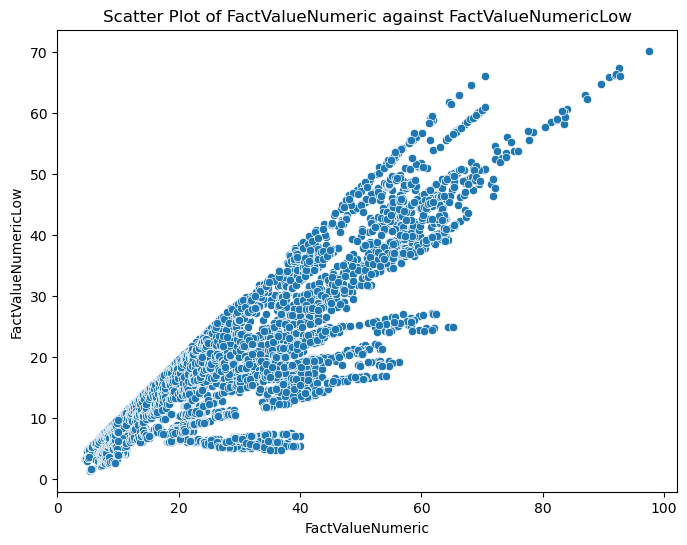

In [50]:
# Scatter plot for 'FactValueNumeric' against 'FactValueNumericLow'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='FactValueNumeric', y='FactValueNumericLow')
plt.xlabel('FactValueNumeric')
plt.ylabel('FactValueNumericLow')
plt.title('Scatter Plot of FactValueNumeric against FactValueNumericLow')
plt.show()

The scatter plot showing the relationship between 'FactValueNumeric' and 'FactValueNumericLow' bears striking resemblance to the previous visualization, yet with a distinct difference.

However, this scatter plot seems to offer an almost mirrored or reversed pattern compared to the previous one depicting 'FactValueNumeric' against 'FactValueNumericHigh'. Despite the resemblance in the formation of points in an upward trend, the relationship between 'FactValueNumeric' and 'FactValueNumericLow' manifests slight differences in their distribution and orientation.

This reversal in the plot suggests a potential contrasting association between 'FactValueNumeric' and 'FactValueNumericLow', highlighting variations in their relationship or behavior within the dataset. 

## 3.4 Comparisons

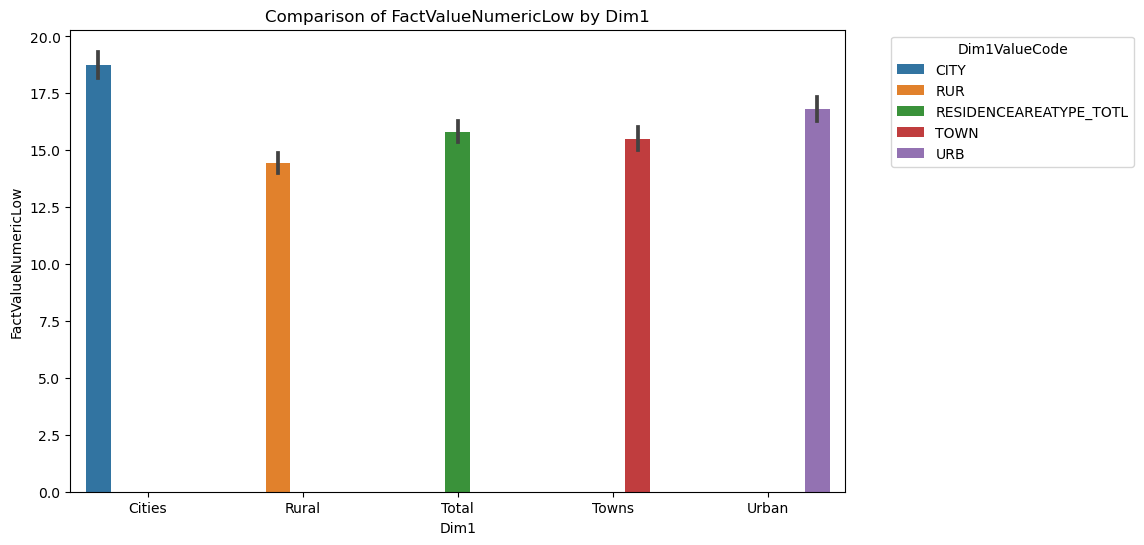

In [51]:
# Barplot comparing 'FactValueNumericLow' and 'FactValueNumericHigh' by 'Dim1'
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Dim1', y='FactValueNumericLow', hue='Dim1ValueCode')
plt.xlabel('Dim1')
plt.ylabel('FactValueNumericLow')
plt.title('Comparison of FactValueNumericLow by Dim1')
plt.legend(title='Dim1ValueCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The barplot comparing 'FactValueNumericLow' and 'FactValueNumericHigh' across different categories of 'Dim1' reveals that among the 'Dim1' categories, 'Cities' emerge with the highest representation, followed closely by 'Urban', 'RESIDENCEAREARTYPE_TOTL (Total)', 'Towns', and 'Rural'.

This visualization accentuates the varying levels or categories within 'Dim1', showcasing their corresponding 'FactValueNumericLow' values. The prominence of 'Cities' and 'Urban' suggests a potentially higher prevalence or concentration of lower 'FactValueNumericLow' values within these categories compared to others like 'RESIDENCEAREARTYPE_TOTL (Total)', 'Towns', and 'Rural'.

## 3.5 Distribution Comparisons

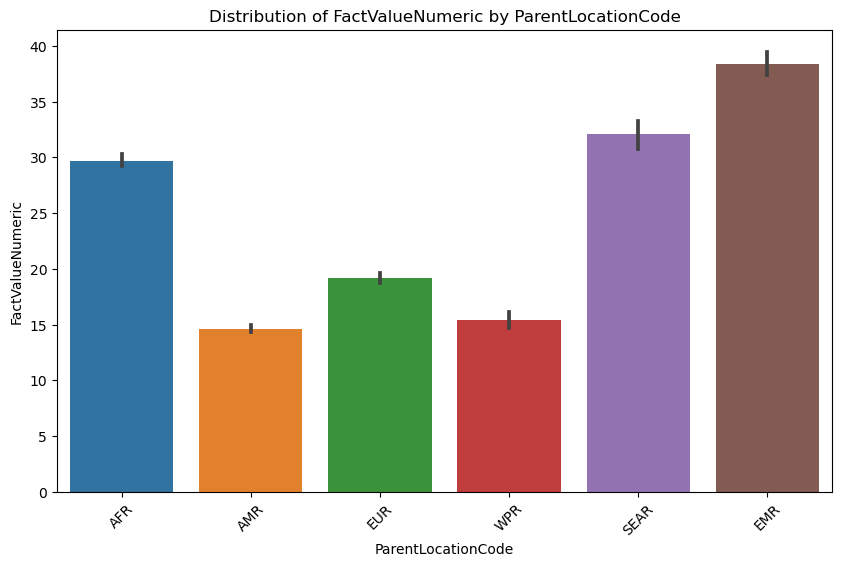

In [54]:
# Bar plot for 'FactValueNumeric' by 'ParentLocationCode'
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='ParentLocationCode', y='FactValueNumeric')
plt.xlabel('ParentLocationCode')
plt.ylabel('FactValueNumeric')
plt.title('Distribution of FactValueNumeric by ParentLocationCode')
plt.xticks(rotation=45)
plt.show()

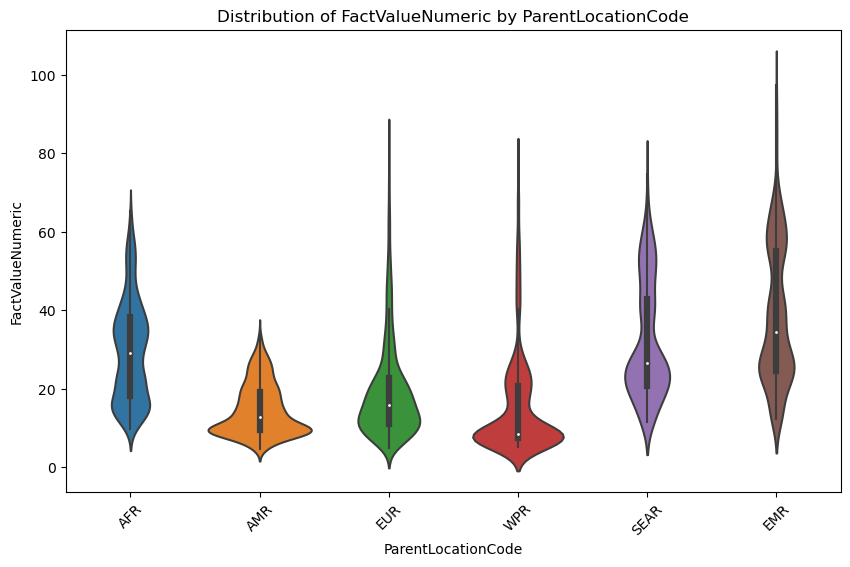

In [55]:
# Violin plot for 'FactValueNumeric' by 'ParentLocationCode'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='ParentLocationCode', y='FactValueNumeric')
plt.xlabel('ParentLocationCode')
plt.ylabel('FactValueNumeric')
plt.title('Distribution of FactValueNumeric by ParentLocationCode')
plt.xticks(rotation=45)
plt.show()

The bar plot detailing the distribution of 'FactValueNumeric' across different 'ParentLocationCode' categories unveils distinctive variations in values within the dataset. Notably, 'EMR' emerges as the category with the highest 'FactValueNumeric' representation, followed by 'SEAR', 'AFR', 'EUR', 'WPR', and 'AMR'.

This representation highlights varying levels or concentrations of 'FactValueNumeric' across different geographical parent locations. The prevalence of higher 'FactValueNumeric' values within 'EMR' and 'SEAR', followed closely by 'AFR', signifies potential distinctions or tendencies specific to these regions. Conversely, 'EUR', 'WPR', and 'AMR' exhibit comparatively lower 'FactValueNumeric' values within this dataset.

### Saving Edited Data to `csv`.

In [53]:
data.to_csv('Updated Air Quality Data - WHO.csv', index = False)

# Key Findings:

Key Findings:

- **Correlations and Covariances:** Significant correlations were observed between specific numeric attributes, such as 'FactValueNumeric' and 'FactValueNumericLow/High', showcasing strong positive relationships. Covariance measurements reaffirmed these associations, highlighting their joint variability.
<br>
- **Distributions:** Visualizations of 'FactValueNumeric' unveiled asymmetric distributions with peaks towards the lower end and extended tails, suggesting potential outliers or varying clusters within the dataset.
<br>
- **Categorical Attributes:** 'ParentLocationCode' exhibited varied representations, with 'EMR' standing out as the highest, offering insights into the geographical diversity of data. Meanwhile, 'IsLatestYear' showcased a notable imbalance with a majority classified as 'False'.
<br>
- **Relationships:** Scatter plots between 'FactValueNumeric' and other attributes depicted discernible patterns, revealing potential positive correlations with scattered and diverse distributions.
<br>

- **Segmented Analysis:** Barplots and comparisons across 'Dim1' and 'ParentLocationCode' delineated varying trends and distributions within distinct categories, unveiling disparities and concentrations within specific classifications.

# Conclusion:

The analysis provided comprehensive insights into the dataset's numeric and categorical attributes, showcasing correlations, distributions, and categorical representations. Distinct patterns, relationships, and disparities were observed, indicating the need for further exploration and targeted analysis within specific subgroups or classifications.